importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing csv data_set file in python notebook

In [3]:
df = pd.read_csv('diwali_sales.csv', encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

Data Cleaning

In [5]:
df.info() #to check null columns in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


as we can see that there are two columns ['Status','unnamed1'] contains null values so we have to remove those columns 

In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


now there is no null columns but still we have to find the null values in the data set

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

there are still 12row with null values in amount columns

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
df['Amount']=df['Amount'].astype(int)#converting float values into integers

In [12]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


now all the null values and columns are removed.|

ANALYSIS

Gender sales Analysis

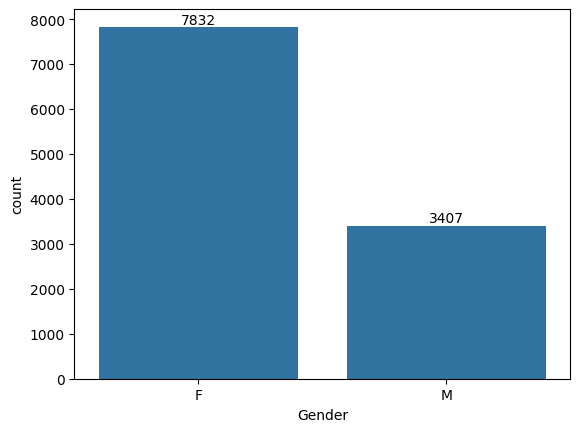

In [13]:
ax= sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars) # order given by male and female customers.

In [14]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen


,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

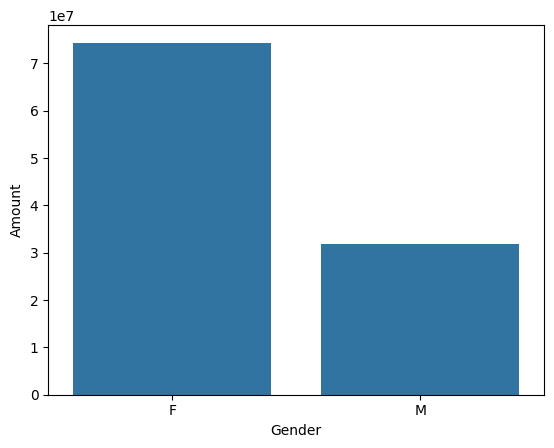

In [15]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

from this we can easily understand that the female buyers gives more orders and purchased things of more Amount.

Age

In [16]:
df.columns #extracting column names from the data set

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

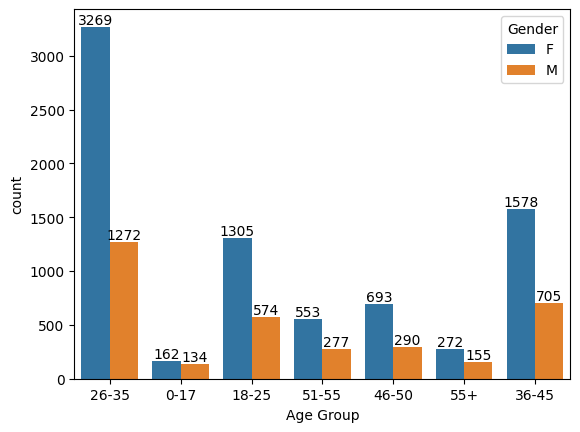

In [17]:
age_ana=sns.countplot(data=df,x='Age Group', hue='Gender')
for bars in age_ana.containers:
    age_ana.bar_label(bars) 

Here we can easily mark that female of age group of 26 to 35 have ordered more than men's.

Now we are going to analyse top 10 states where we can see the total number of order according to state

<Axes: xlabel='State', ylabel='Orders'>

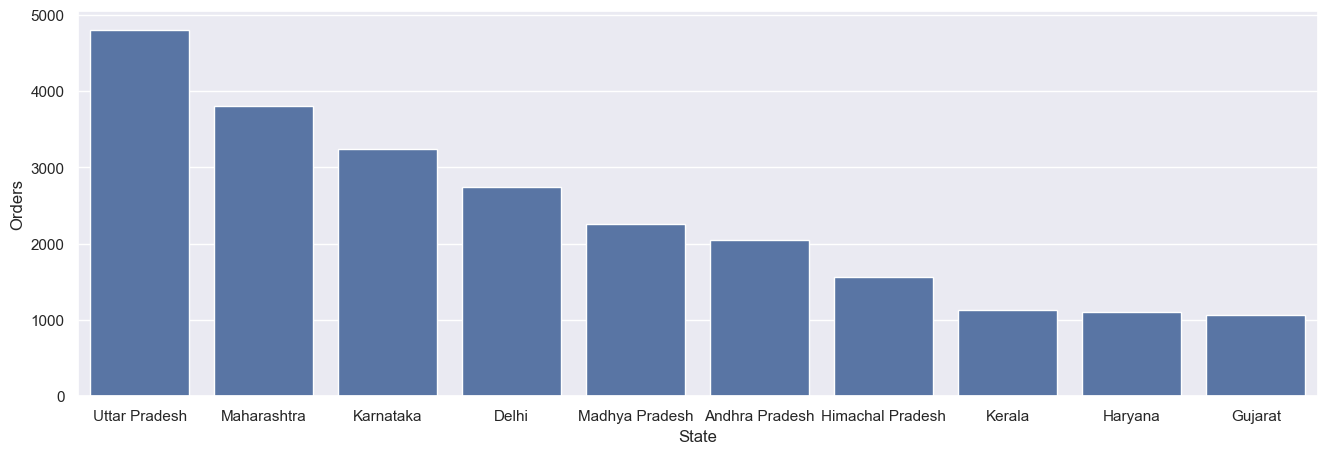

In [18]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

from this graph we can say that uttar pardesh has generated most orders in diwali.

<Axes: xlabel='State', ylabel='Amount'>

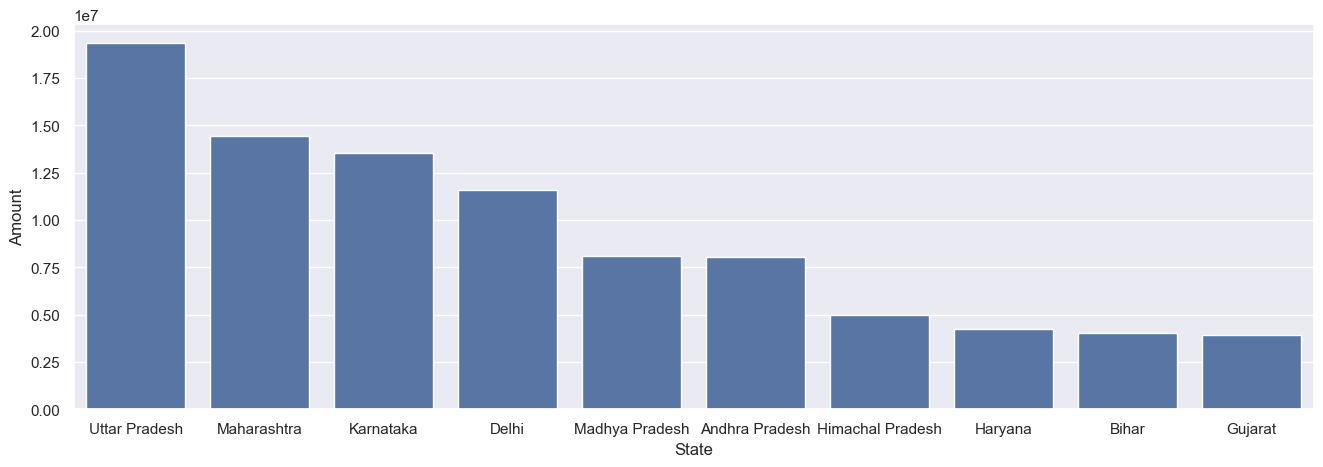

In [19]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

now from this graph we can see which states spent more on orders.

Marital status

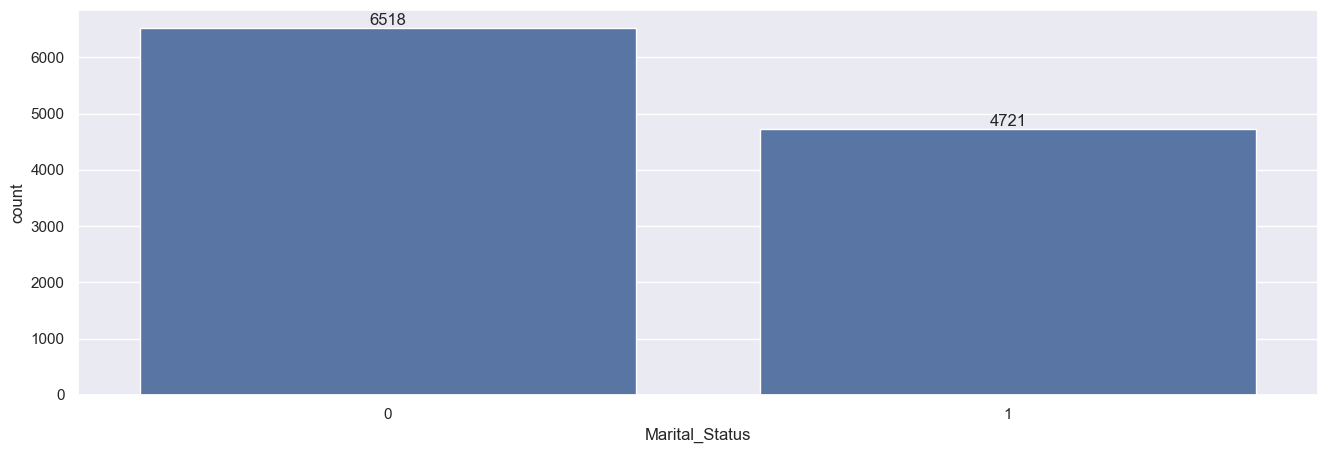

In [20]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

total shopping done by married people are 6518

<Axes: xlabel='Marital_Status', ylabel='Amount'>

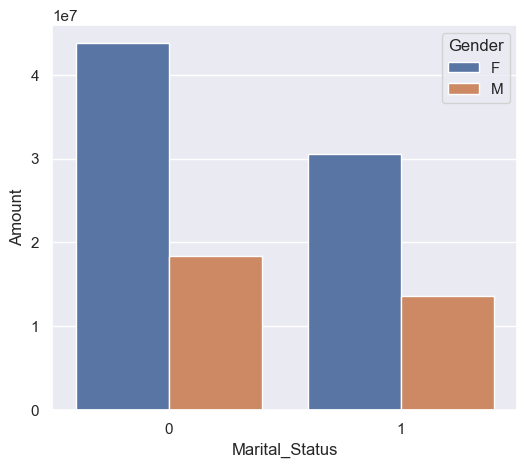

In [21]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

From above graph we can say that married women placed more orders and spent more money in diwali 

analysis based on Occupation

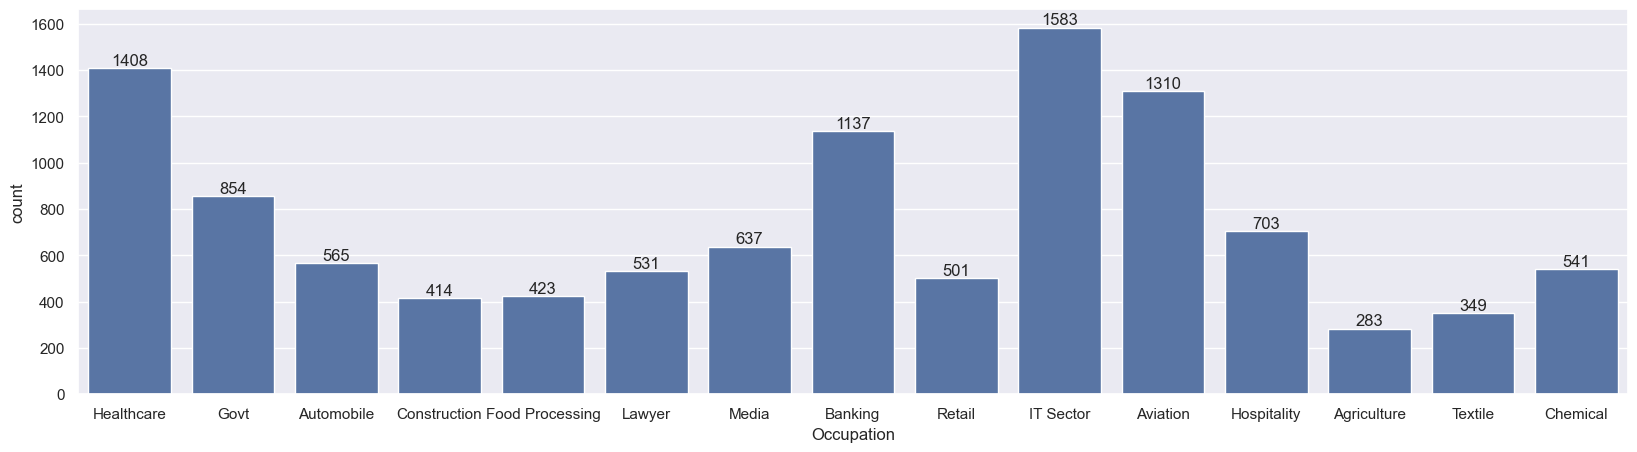

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can coclude that the maximum order is placed from IT sector and second is healthcar 

<Axes: xlabel='Occupation', ylabel='Amount'>

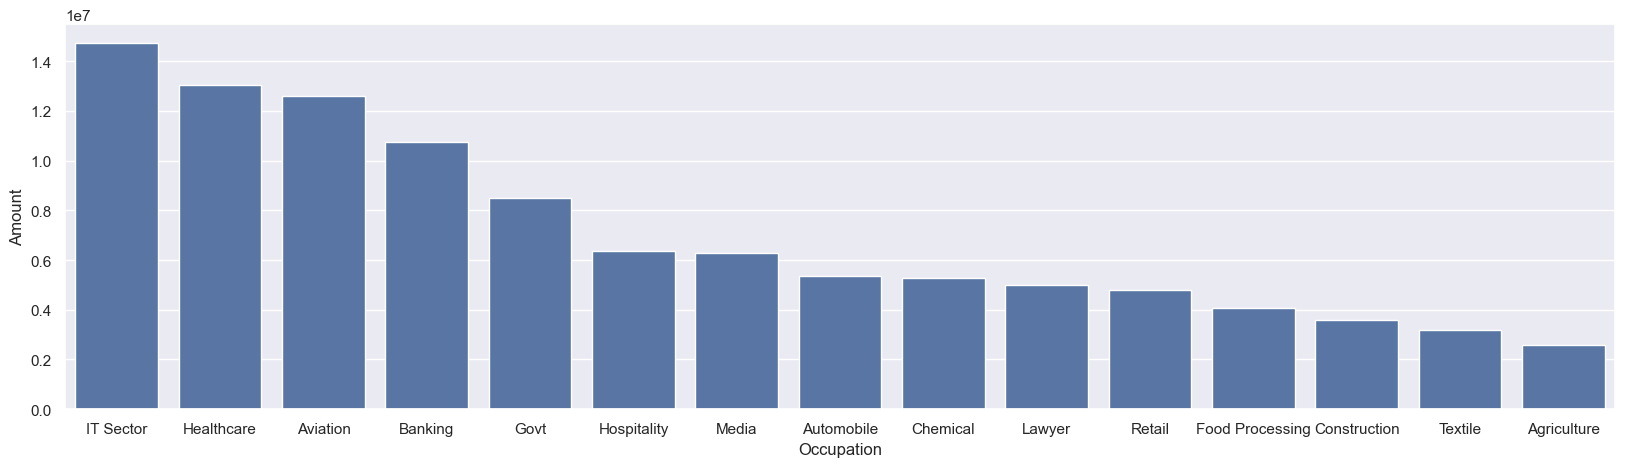

In [23]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

from this we can see that which sector spent more money in diwali top 3 are IT,Healthcare, Aviation

Product_category Analysis

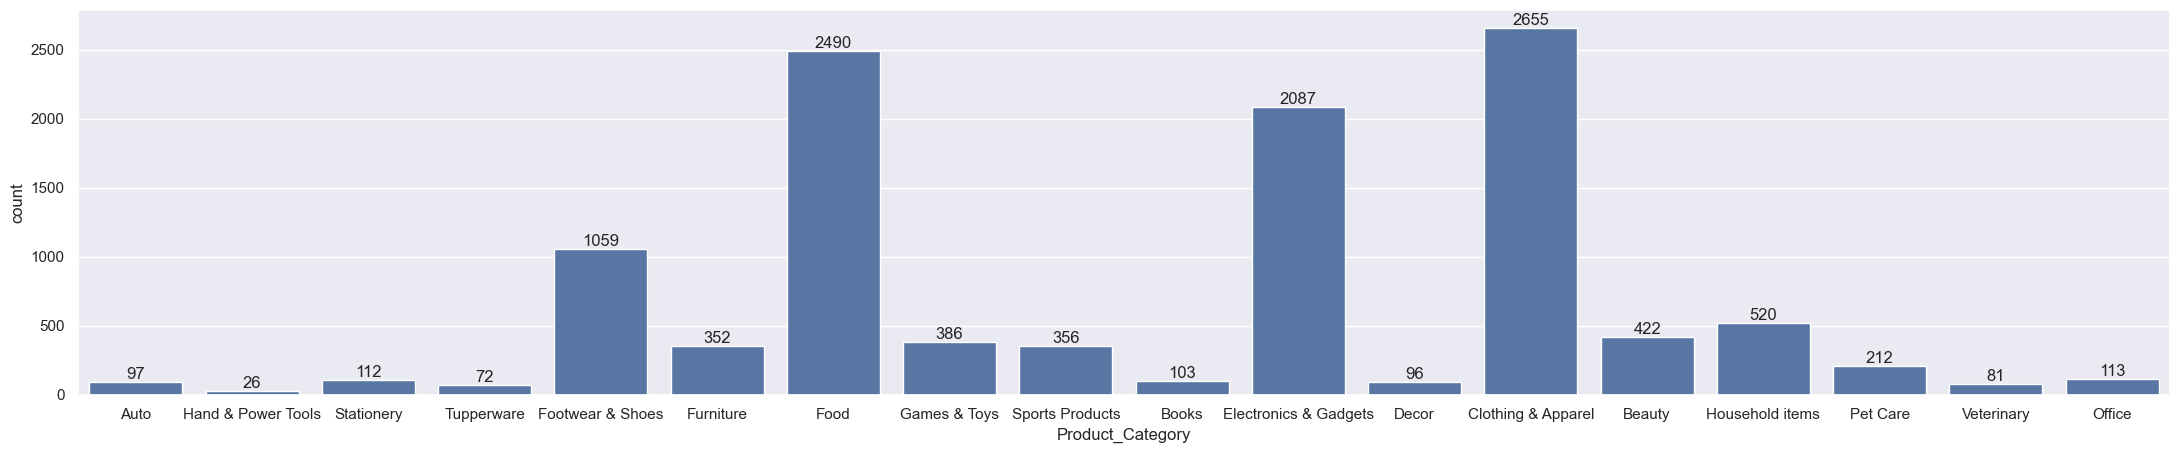

In [24]:
sns.set(rc={'figure.figsize':(27,5)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

the maximum sales is from the clothing & Apparel category

<Axes: xlabel='Product_Category', ylabel='Amount'>

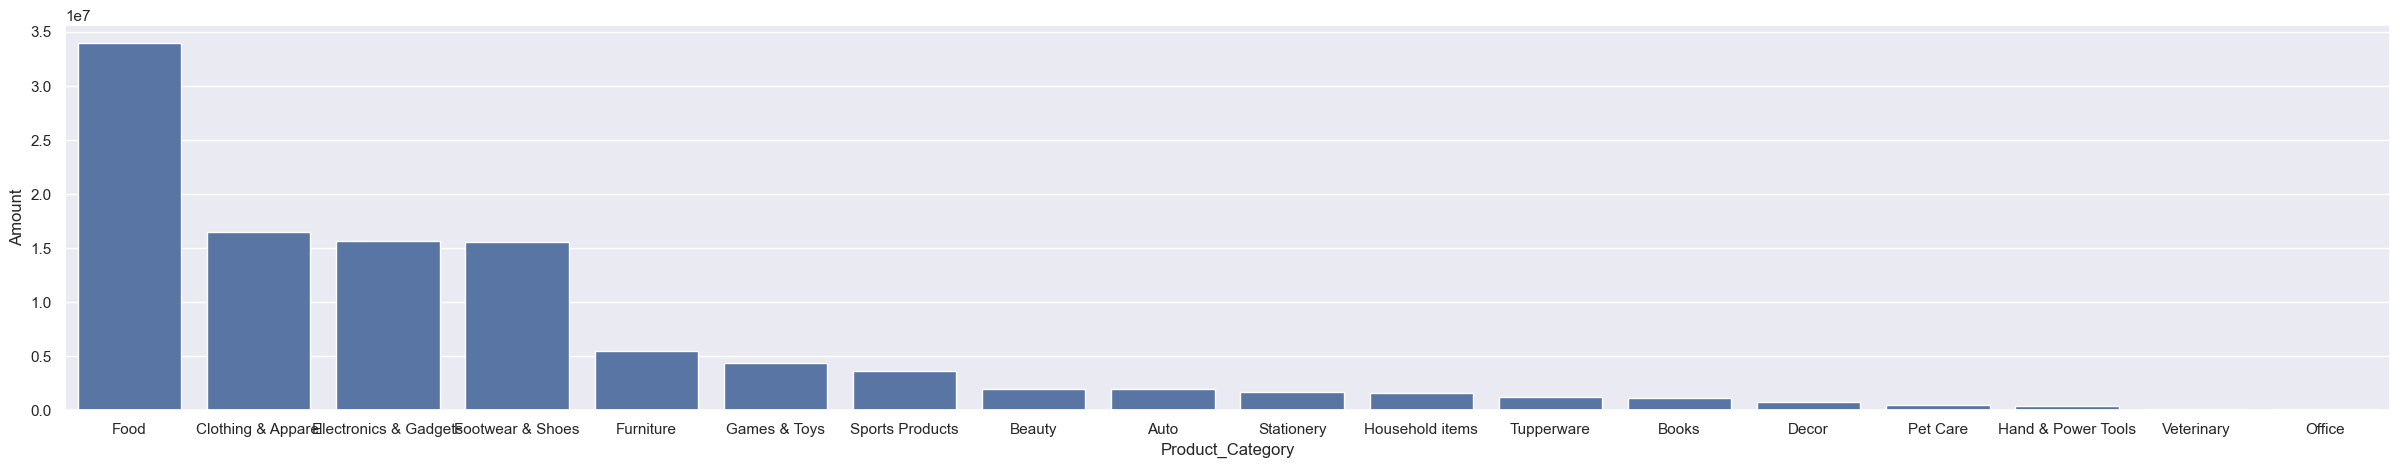

In [25]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

from the above graph we conclude that the maximum expenditure is on food category

Product_id sales analysis

<Axes: xlabel='Product_ID', ylabel='Orders'>

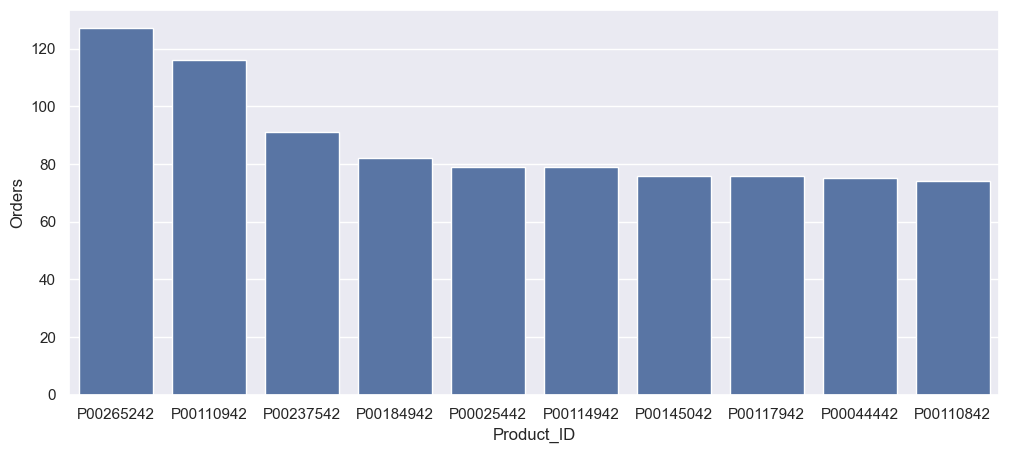

In [34]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

from the above graph we can conclude that P00265242 has highest orders in products.

Conclusion

From the whole analysis we can conclude some major points